In [79]:
#Importing necessary packages in Python 
%matplotlib inline 
import matplotlib.pyplot as plt 

import numpy as np ; np.random.seed(sum(map(ord, "aesthetics")))
import pandas as pd
import math

from sklearn.datasets import make_classification 
from sklearn.model_selection import learning_curve 
#from sklearn.cross_validation import train_test_split 
#from sklearn.grid_search import GridSearchCV
#from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler

import seaborn as sns
sns.set_context('notebook') 
sns.set_style(style='darkgrid')


from pprint import pprint 

# Predicting German Credit Default

https://www.kaggle.com/hendraherviawan/predicting-german-credit-default

https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)

## Read Data

In [28]:
file = '../data/Germany/german.data'

names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

data = pd.read_csv(file,names = names, delimiter=' ')

print(data.shape)
data.head()

(1000, 21)


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [29]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
data.classification.replace([1,2], [1,0], inplace=True)
# Print number of 'good' credits (should be 700) and 'bad credits (should be 300)
data.classification.value_counts()

1    700
0    300
Name: classification, dtype: int64

In [30]:
risk={1:"Good Risk", 0:"Bad Risk"}
data["Cost Matrix(Risk)"]=data["classification"].map(risk)

## Analyze and correct features

Attribute Information:

Attribute 1: (qualitative) <br> 
Status of existing checking account <br> 
A11 : ... < 0 DM <br> 
A12 : 0 <= ... < 200 DM <br> 
A13 : ... >= 200 DM / salary assignments for at least 1 year <br> 
A14 : no checking account <br> 

Attribute 2: (numerical) <br> 
Duration in month <br> 

Attribute 3: (qualitative) <br> 
Credit history <br> 
A30 : no credits taken/ all credits paid back duly <br> 
A31 : all credits at this bank paid back duly <br> 
A32 : existing credits paid back duly till now <br> 
A33 : delay in paying off in the past <br> 
A34 : critical account/ other credits existing (not at this bank) <br> 

Attribute 4: (qualitative) <br> 
Purpose <br> 
A40 : car (new) <br> 
A41 : car (used) <br> 
A42 : furniture/equipment <br> 
A43 : radio/television <br> 
A44 : domestic appliances <br> 
A45 : repairs <br> 
A46 : education <br> 
A47 : (vacation - does not exist?) <br> 
A48 : retraining <br> 
A49 : business <br> 
A410 : others <br> 

Attribute 5: (numerical) <br> 
Credit amount <br> 

Attibute 6: (qualitative) <br> 
Savings account/bonds <br> 
A61 : ... < 100 DM <br> 
A62 : 100 <= ... < 500 DM <br> 
A63 : 500 <= ... < 1000 DM <br> 
A64 : .. >= 1000 DM <br> 
A65 : unknown/ no savings account <br> 

Attribute 7: (qualitative) <br> 
Present employment since <br> 
A71 : unemployed <br> 
A72 : ... < 1 year <br> 
A73 : 1 <= ... < 4 years <br> 
A74 : 4 <= ... < 7 years <br> 
A75 : .. >= 7 years <br> 

Attribute 8: (numerical) <br> 
Installment rate in percentage of disposable income <br> 

Attribute 9: (qualitative) <br> 
Personal status and sex <br> 
A91 : male : divorced/separated <br> 
A92 : female : divorced/separated/married <br> 
A93 : male : single <br> 
A94 : male : married/widowed <br> 
A95 : female : single <br> 

Attribute 10: (qualitative) <br> 
Other debtors / guarantors <br> 
A101 : none <br> 
A102 : co-applicant <br> 
A103 : guarantor <br> 

Attribute 11: (numerical) <br> 
Present residence since <br> 

Attribute 12: (qualitative)<br> 
Property <br> 
A121 : real estate <br> 
A122 : if not A121 : building society savings agreement/ life insurance <br> 
A123 : if not A121/A122 : car or other, not in attribute 6 <br> 
A124 : unknown / no property <br> 

Attribute 13: (numerical) <br> 
Age in years <br> 

Attribute 14: (qualitative) <br> 
Other installment plans <br> 
A141 : bank <br> 
A142 : stores <br> 
A143 : none <br> 

Attribute 15: (qualitative) <br> 
Housing <br> 
A151 : rent <br> 
A152 : own <br> 
A153 : for free <br> 

Attribute 16: (numerical) <br> 
Number of existing credits at this bank <br> 

Attribute 17: (qualitative) <br> 
Job <br> 
A171 : unemployed/ unskilled - non-resident <br> 
A172 : unskilled - resident <br> 
A173 : skilled employee / official <br> 
A174 : management/ self-employed/ <br> 
highly qualified employee/ officer <br> 

Attribute 18: (numerical) <br> 
Number of people being liable to provide maintenance for <br> 

Attribute 19: (qualitative) <br> 
Telephone <br> 
A191 : none <br> 
A192 : yes, registered under the customers name <br> 

Attribute 20: (qualitative) <br> 
foreign worker <br> 
A201 : yes <br> 
A202 : no <br> 

In [89]:
def visualize_distribution(attr, df):
    good_risk_df = df[df["Cost Matrix(Risk)"]=="Good Risk"]
    bad_risk_df = df[df["Cost Matrix(Risk)"]=="Bad Risk"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_good_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_bad_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    
    vmax = max(max(attr_good_risk_df['Cost Matrix(Risk)']), max(attr_bad_risk_df['Cost Matrix(Risk)']))
    vmax = int(math.ceil(vmax / 100.0)) * 100    
    
    ax[0].set_xlim(0, vmax)
    ax[1].set_xlim(0, vmax)
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
   
    #ax[1].set_ylim(0, 350)
    
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()
    
    
def distplot(attr, df):
    plt.figure(figsize = (14,6))
    plt.title('{} - Density Plot'.format(attr))
    sns.set_color_codes("pastel")
    sns.distplot(df[attr],kde=True,bins=200, color="blue")
    plt.show()
    

In [90]:
print(data.columns)

Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification',
       'Cost Matrix(Risk)', 'numeric_check', 'numeric_sav', 'liq_ind'],
      dtype='object')


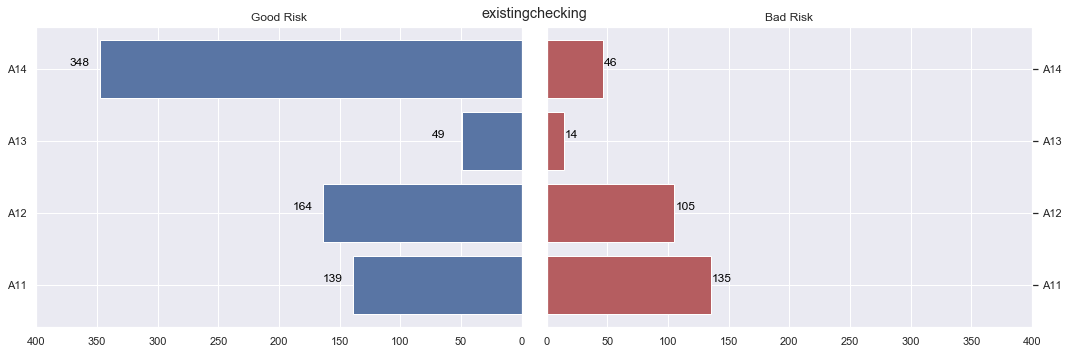

In [91]:
visualize_distribution("existingchecking", data)

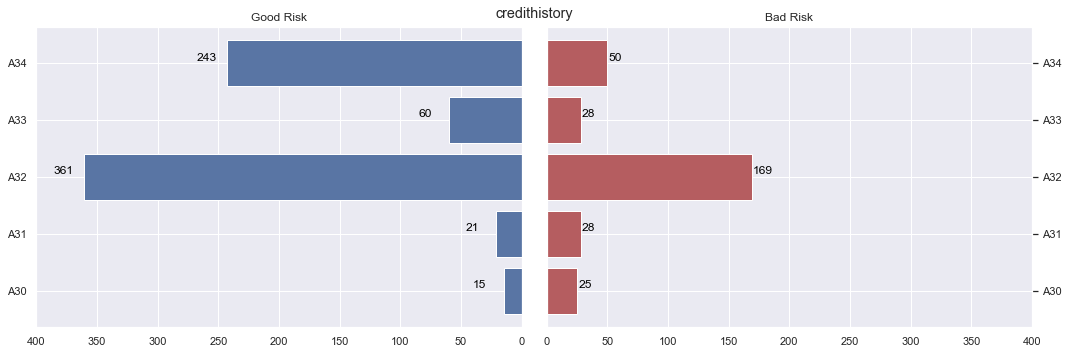

In [92]:
visualize_distribution('credithistory', data)

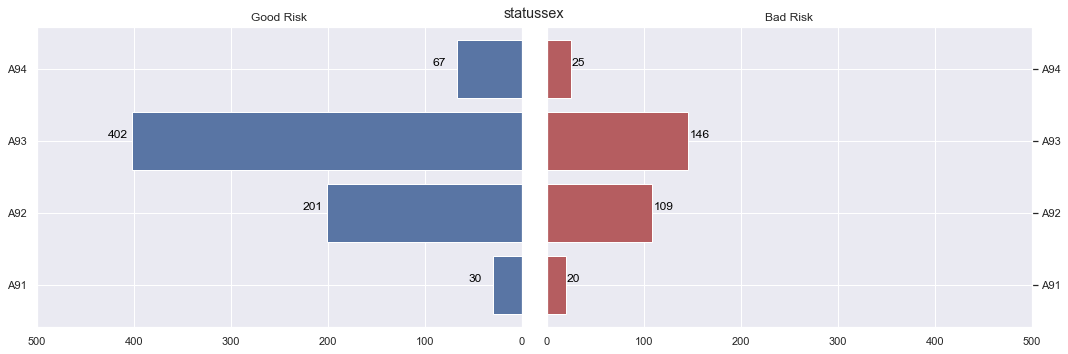

In [94]:
visualize_distribution('statussex', data)

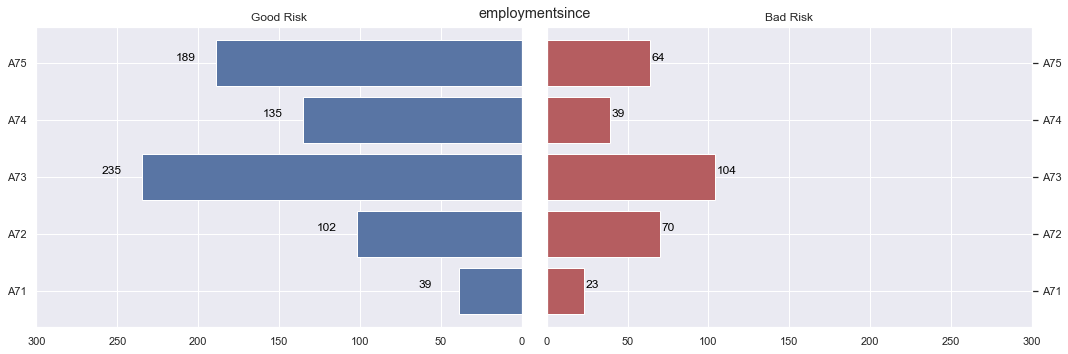

In [95]:
visualize_distribution('employmentsince', data)

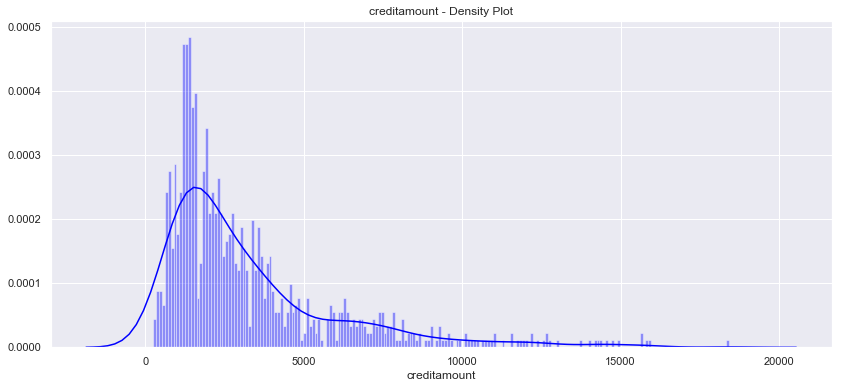

In [34]:
distplot('creditamount', data)

## Predictions

In [40]:
data['numeric_check'] = data['existingchecking'].map({'A11': 0, 'A12': 100, 'A13': 200, 'A14': 0})
data['numeric_sav'] = data['savings'].map({'A61': 50, 'A62': 300, 'A63': 750, 'A64': 1000, 'A65': 0})
data['liq_ind'] = (data.numeric_check + data.numeric_sav)/data.creditamount

In [41]:
#numerical variables labels
numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'liq_ind', 'classification']

# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars].drop(['classification'], axis=1)))
numdata_std.head(3)


c:\users\rober\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\rober\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7
0,-0.745131,-1.236478,0.918477,1.046987,2.766456,1.027079,-0.428290,-0.446336
1,0.949817,2.248194,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,-0.352129
2,-0.416562,-0.738668,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.357178


In [42]:
from collections import defaultdict

#categorical variables labels
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']

d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", data[catvars[x]].unique())
    print(catvars[x],": ", lecatdata[catvars[x]].unique())

#One hot encoding, create dummy variables for every category of every categorical variable
dummyvars = pd.get_dummies(data[catvars])

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
employmentsince :  [4 2 3 0 1]
statussex :  ['A93' 'A92' 'A91' 'A94']
statussex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


In [43]:
data_clean = pd.concat([data[numvars], dummyvars], axis = 1)


In [44]:
# Unscaled, unnormalized data
X_clean = data_clean.drop('classification', axis=1)
y_clean = data_clean['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.2, random_state=1)

In [49]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import xgboost as xgb
from xgboost import XGBClassifier
#print('XGBoost v',xgb.__version__)

# fit, train and cross validate Decision Tree with training and test data 
def xgbclf(params, X_train, y_train,X_test, y_test):
  
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    model = XGBClassifier(**params).\
      fit(X_train, y_train, eval_set=eval_set, \
                  eval_metric='auc', early_stopping_rounds = 100, verbose=100)
        
    #print(model.best_ntree_limit)

    model.set_params(**{'n_estimators': model.best_ntree_limit})
    model.fit(X_train, y_train)
    #print(model,'\n')
    
    # Predict target variables y for test data
    y_pred = model.predict(X_test, ntree_limit=model.best_ntree_limit) #model.best_iteration
    #print(y_pred)
   
    # Get Cross Validation and Confusion matrix
    #get_eval(model, X_train, y_train)
    #get_eval2(model, X_train, y_train,X_test, y_test)
    
    # Create and print confusion matrix    
    abclf_cm = confusion_matrix(y_test,y_pred)
    print(abclf_cm)
    
    #y_pred = model.predict(X_test)
    print (classification_report(y_test,y_pred) )
    print ('\n')
    print ("Model Final Generalization Accuracy: %.6f" %accuracy_score(y_test,y_pred) )
    
    # Predict probabilities target variables y for test data
    y_pred_proba = model.predict_proba(X_test, ntree_limit=model.best_ntree_limit)[:,1] #model.best_iteration
    get_roc (y_test,y_pred_proba)
    return model

def plot_featureImportance(model, keys, num):
    importances = model.feature_importances_

    importance_frame = pd.DataFrame({'Importance': list(importances), 'Feature': list(keys)})
    importance_frame.sort_values(by = 'Importance', inplace = True)
    importance_frame.tail(num).plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')

In [50]:
# Function for evaluation reports
def get_eval1(clf, X,y):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X, y, cv=2, scoring='accuracy')
    scores2 = cross_val_score(clf, X, y, cv=2, scoring='precision')
    scores3 = cross_val_score(clf, X, y, cv=2, scoring='recall')
    scores4 = cross_val_score(clf, X, y, cv=2, scoring='roc_auc')
    
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std()))
    
    return 

def get_eval2(clf, X_train, y_train,X_test, y_test):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X_test, y_test, cv=2, scoring='accuracy')
    scores2 = cross_val_score(clf, X_test, y_test, cv=2, scoring='precision')
    scores3 = cross_val_score(clf, X_test, y_test, cv=2, scoring='recall')
    scores4 = cross_val_score(clf, X_test, y_test, cv=2, scoring='roc_auc')
    
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std()))
    
    return  
  
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

[0]	validation_0-auc:0.78318	validation_1-auc:0.69732
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.89713	validation_1-auc:0.77594
Stopping. Best iteration:
[32]	validation_0-auc:0.88270	validation_1-auc:0.78387

[[ 19  40]
 [ 11 130]]
              precision    recall  f1-score   support

           0       0.63      0.32      0.43        59
           1       0.76      0.92      0.84       141

   micro avg       0.74      0.74      0.74       200
   macro avg       0.70      0.62      0.63       200
weighted avg       0.73      0.74      0.72       200



Model Final Generalization Accuracy: 0.745000


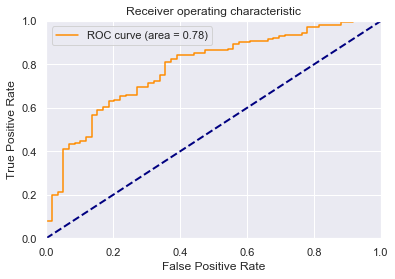

In [51]:
params={}

params1={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.3,
    'min_child_weight':3,
    'max_depth':3,
    #'seed':1024,
    'n_jobs' : -1
}

params2={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.005,
    #'gamma':0.01,
    'subsample':0.555,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'max_depth':8,
    #'seed':1024,
    'n_jobs' : -1
}

model = xgbclf(params2, X_train_clean, y_train_clean, X_test_clean, y_test_clean)

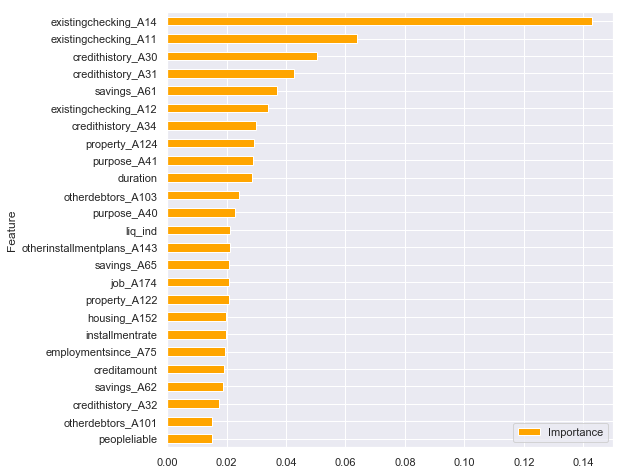

In [93]:
plot_featureImportance(model, X_train_clean.keys(), 25)

In [ ]:
from imblearn.over_sampling import SMOTE

# Oversampling
# http://contrib.scikit-learn.org/imbalanced-learn/auto_examples/combine/plot_smote_enn.html#sphx-glr-auto-examples-combine-plot-smote-enn-py

# Apply SMOTE
sm = SMOTE(ratio='auto')
X_train_clean_res, y_train_clean_res = sm.fit_sample(X_train_clean, y_train_clean)

# Print number of 'good' credits and 'bad credits, should be fairly balanced now
print("Before/After clean")
unique, counts = np.unique(y_train_clean, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_clean_res, return_counts=True)
print(dict(zip(unique, counts)))

In [ ]:
from sklearn.linear_model import LogisticRegression

# fit, train and cross validate Decision Tree with training and test data 
def logregclf(X_train, y_train,X_test, y_test):
    print("LogisticRegression")
    model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)
    print(model,'\n')

    # Predict target variables y for test data
    y_pred = model.predict_proba(X_test)[:,1]

    # Get Cross Validation and Confusion matrix
    #get_eval(model, X_train, y_train,y_test,y_pred)
    #get_eval2(model, X_train, y_train,X_test, y_test,y_pred)
    get_roc (y_test,y_pred)
    return

# Logistic Regression
#logregclf(X_train, y_train,X_test,y_test)
logregclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

In [ ]:
#Great, before we do anything else, let's split the data into train/test.
X_train_clean_res = pd.DataFrame(X_train_clean_res, columns=X_train_clean.keys())
#y_train_clean_res = pd.DataFrame(y_train_clean_res)

In [ ]:
print(np.shape(X_train_clean_res))
print(np.shape(y_train_clean_res))
print(np.shape(X_test_clean)) 
print(np.shape(y_test_clean))

In [ ]:
params = {}

params1={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.3,
    'min_child_weight':3,
    'max_depth':3,
    #'seed':1024,
    'n_jobs' : -1
}

params2={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.005,
    #'gamma':0.01,
    'subsample':0.555,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'max_depth':8,
    #'seed':1024,
    'n_jobs' : -1
}

#xgbclf(params, X_train, y_train,X_test,y_test)
model = xgbclf(params2,X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)
model
#plot_featureImportance(model, X_train_clean_res.keys())